In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xml.etree.ElementTree as ET
from PIL import Image, ImageSequence

In [2]:
def fileRead(filename):
    
    #xmlデータを読み込みます
    tree = ET.parse(filename)
    #一番上の階層の要素を取り出します
    root = tree.getroot()
    
    X,Y,Z=[],[],[]
    totI=[]
    
    for Spot in root.iter('Spot'):
        X.append(float(Spot.attrib["POSITION_X"]))
        Y.append(float(Spot.attrib["POSITION_Y"]))
        Z.append(float(Spot.attrib["POSITION_Z"]))
        totI.append(float(Spot.attrib["TOTAL_INTENSITY_CH1"]))
    return X,Y,Z, totI

def neighborhood_detection(X,Y,totI, Xo,Yo,Zo, mindist=2):
    # Zo-totI index matching by neighborhood detection between (X,Y) and (Xo,Yo)
    X_correct, Y_correct = [],[]
    totI_correct = []
    Xo_correct,Yo_correct,Zo_correct = [],[],[]
    
    for i in range(0,len(Xo)):
        for j in range(0,len(X)):
            if np.abs(Xo[i] - X[j]) < mindist and np.abs(Yo[i] - Y[j]) < mindist:
                X_correct.append(X[j])
                Y_correct.append(Y[j])
                totI_correct.append(totI[j])
                
                Xo_correct.append(Xo[i])
                Yo_correct.append(Yo[i])
                Zo_correct.append(Zo[i])
    # same index => same bead
    return X_correct,Y_correct,totI_correct, Xo_correct,Yo_correct,Zo_correct


def pltdist(X,Y,xlabel, ylabel, savename):
    plt.figure(figsize=(12, 8))
    # plt.grid(color = "gray", linestyle="--")
    plt.legend( ) # add legend
    # plt.subplot(221)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel(xlabel, fontsize = 20) # x axis label
    plt.ylabel(ylabel, fontsize = 20) # y axis label
    plt.plot(X, Y, ".",color="red")
    plt.savefig(savename)
    plt.show()


def pltprojection(XorY,totI, xlabel, ylabel, savename, ylim=[0,1*10**6]):
    plt.figure(figsize=(12, 8))
    # plt.grid(color = "gray", linestyle="--")
    # plt.subplot(222)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.ylim(ylim)
    plt.xlabel(xlabel, fontsize = 20) # x axis label
    plt.ylabel(ylabel, fontsize = 20) # y axis label
    for i in range(0,len(XorY)):
        plt.plot(XorY[i], totI[i], ".", color=cm.hsv(i/len(XorY)))
    plt.legend(fontsize = 20) # add legend
    plt.savefig(savename)
    plt.show()


def fit(Z, totI):
    def line(x, a, b):
        return a*x + b
    p0 = (0.1, -0.1)
    popt,pcov = curve_fit(line, Z, totI , p0)
    print(popt)
    print(pcov)
    
    Ifit = popt[0]*np.array(Z)+popt[1]
    perr = np.sqrt(np.diag(pcov))
    return popt, pcov, Ifit, perr

def plttot(Z,totI,Ifit, xlabel, ylabel, popt, savename, ylim=[0,1*10**6], a ="totI"):
    plt.figure(figsize=(12, 8))
    # plt.grid(color = "gray", linestyle="--")
    # plt.subplot(222)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.ylim(ylim)
    plt.xlabel(xlabel, fontsize = 20) # x axis label
    plt.ylabel(ylabel, fontsize = 20) # y axis label
    if a == "totI":
        plt.plot(Z, Ifit, "-", label=f"Linear Fit \n$I = {round(popt[0])}Z+{round(popt[1]*10**-6, 3)}×10^6$")
    if a == "Rate":
        plt.plot(Z, Ifit, "-", label=f"Linear Fit \n$I = {round(popt[0],5)}Z+{round(popt[1], 3)}$")
    plt.plot(Z, totI, ".",color="red")
    plt.legend(fontsize = 20) # add legend
    plt.savefig(savename)
    plt.show()


def plt3D(X, Y, Q, xlabel, ylabel, zlabel, savename):
    fig = plt.figure()
    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')
    ax.set_xlabel(xlabel, fontsize = 10) # x axis label
    ax.set_ylabel(ylabel, fontsize = 10) # y axis label
    ax.set_zlabel(zlabel, fontsize = 10) # z axis label
    
    # plotting
    ax.plot3D(X, Y, Q, ".", color="green")
    ax.set_title('3D plot')
    plt.savefig(savename)
    plt.show()

### (Xd,Yd),totId,  (Xi,Yi),totIi,  (Xo2,Yo2),Zo2


* ( (Xd,Yd),totId + (Xi,Yi),totIi )/2 = (Xsum,Ysum),totIsum
    
    * (Xd,Yd),totId -> (Xd2,Yd2),totId2    
* ( (Xd2,Yd2),totId2 / (Xsum,Ysum),totIsum) = (Xsum,Ysum),totIsum, (totIdnorm)


    * (Xo,Yo),Zo -> (Xonorm,Yonorm),Zonorm
    * (Xsum,Ysum),totIdnorm -> (Xd3,Yd3),totIdnorm3
* (Xonorm,Yonorm),Zonorm = (Xsumcorrect,Ysumcorrect),totIdnorm3
* like this...
* (Xod,Yod),Zod = (Xdcorrect,Ydcorrect),totIdcorrect
* (Xoi,Yoi),Zoi = (Xicorrect,Yicorrect),totIicorrect
* (Xosum,Yosum),Zosum = (Xsumcorrect,Ysumcorrect),totIsumcorrect


# Original

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


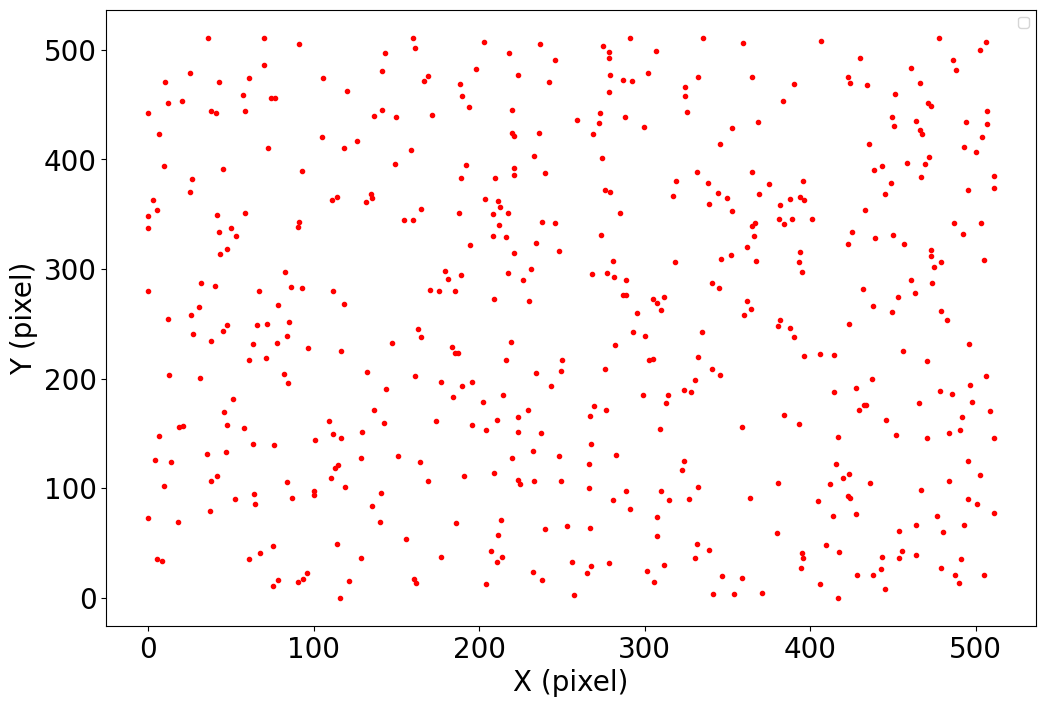

In [3]:
Xo, Yo, Zo, totIo = fileRead('LinearDecay.xml')

pltdist(Xo,Yo,'X (pixel)', 'Y (pixel)', 'fig/dist2DD2.jpg')
# pltprojection(Xo, Zo, 'X (pixel)', 'Z (layer)', 'fig/XprojectionO.jpg', ylim=[0,750])
# pltprojection(Yo, Zo, 'Y (pixel)', 'Z (layer)', 'fig/YprojectionO.jpg', ylim=[0,750])

# Decay

[[37669.91447162307, -10509412.633295815], [-10509412.633295815, 5771923495.989379]]
-278.9868992458851 254445.59606867572
[  -278.98689886 254445.59593193]
[[ 1.53543798e+02 -5.72943750e+04]
 [-5.72943750e+04  2.71631938e+07]]


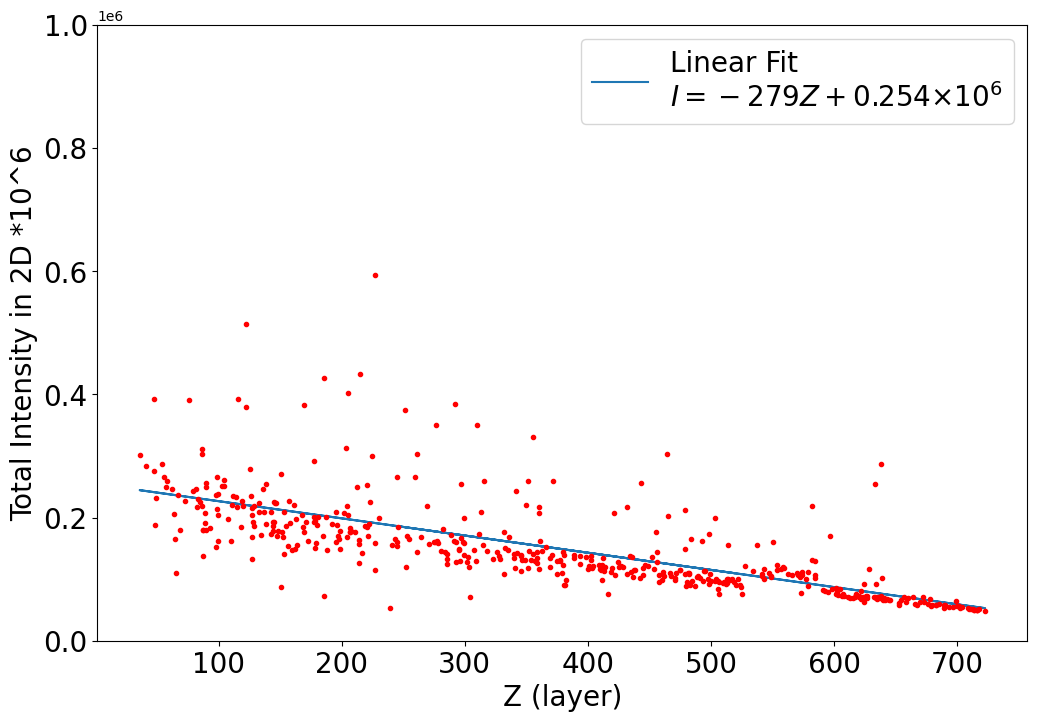

In [17]:
Xd, Yd, Zd, totId = fileRead('img2DfiltD.xml')

# Zd-totId index matching by neighborhood detection between (Xd,Yd) and (Xo,Yo)
Xdcorrect, Ydcorrect, totIdcorrect = [],[],[]
Xod,Yod,Zod = [],[],[]
Xdcorrect,Ydcorrect,totIdcorrect, Xod,Yod,Zod = neighborhood_detection(Xd,Yd,totId, Xo,Yo,Zo, mindist=2)

sqZd = 0
sqtotId = 0
covar = 0
for i in range(0,len(totIdcorrect)):
    sqZd = sqZd + (Zod[i] - np.average(Zod))**2
    sqtotId += (totIdcorrect[i] - np.average(totIdcorrect))**2
    covar += (Zod[i] - np.average(Zod))*(totIdcorrect[i] - np.average(totIdcorrect))

print([[sqZd/len(Zod), covar/len(Zod)],[covar/len(Zod),sqtotId/len(Zod)] ])
print((covar/len(Zod))/(sqZd/len(Zod)), np.average(totIdcorrect)-np.average(Zod)*(covar/len(Zod))/(sqZd/len(Zod)))

poptd, pcovd, Ifitd, perrd = fit(Zod, totIdcorrect)
plttot(Zod,totIdcorrect,Ifitd, "Z (layer)", "Total Intensity in 2D *10^6", poptd, 'fig/2DTotalIntensiyD.jpg', ylim=[0,1*10**6])
# pltdist(Xd,Yd,'X (pixel)', 'Y (pixel)', 'fig/dist2DD.jpg')
# plt3D(Xd, Yd, totId, 'X (pixel)', 'Y (pixel)', 'Total Intensity', 'fig/dist3DD.jpg')

# Increase

[  344.60449502 15031.21757516]
[[ 2.57182504e+02 -1.01403528e+05]
 [-1.01403528e+05  4.94123861e+07]]


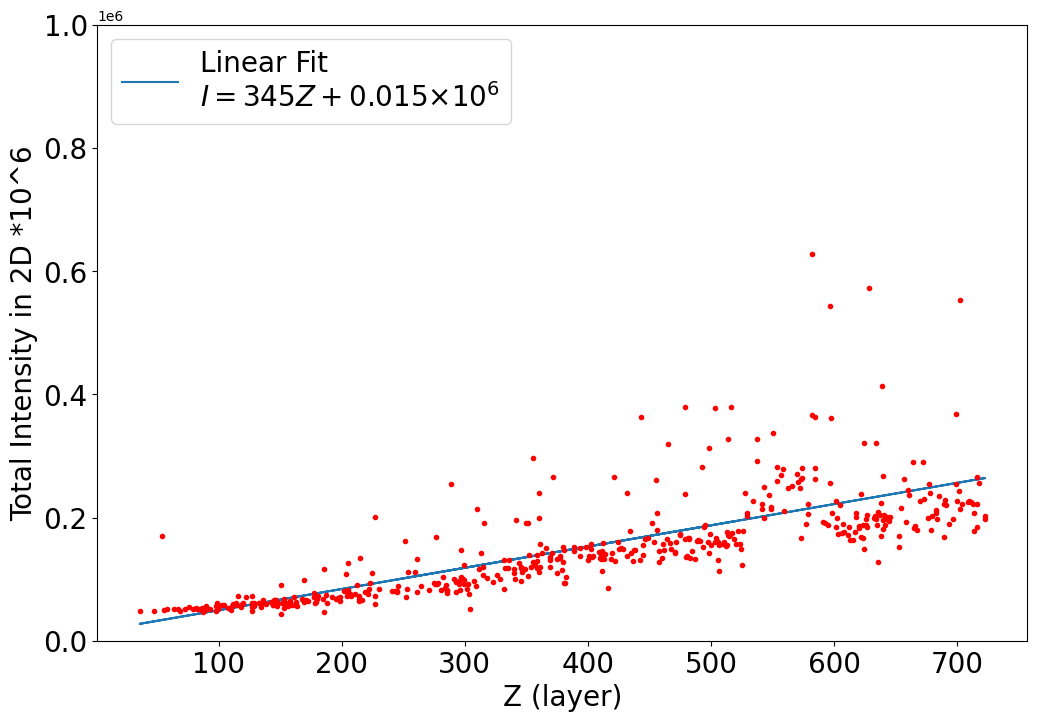

In [5]:
Xi, Yi, Zi, totIi = fileRead('img2DfiltI.xml')

# Zo-totIi index matching by neighborhood detection between (Xi,Yi) and (Xo,Yo)
Xicorrect, Yicorrect, totIicorrect = [],[],[]
Xoi,Yoi,Zoi = [],[],[]
Xicorrect,Yicorrect,totIicorrect, Xoi,Yoi,Zoi = neighborhood_detection(Xi,Yi,totIi, Xo,Yo,Zo, mindist=2)

popti, pcovi, Ifiti, perri = fit(Zoi, totIicorrect)
plttot(Zoi,totIicorrect,Ifiti, "Z (layer)", "Total Intensity in 2D *10^6", popti, 'fig/2DTotalIntensiyI.jpg', ylim=[0,1*10**6])
# pltdist(Xi,Yi,'X (pixel)', 'Y (pixel)', 'fig/dist2DI.jpg')
# plt3D(Xi, Yi, totIi, 'X (pixel)', 'Y (pixel)', 'Total Intensity', 'fig/dist3DI.jpg')

# Sum

[6.57755368e+01 2.69898033e+05]
[[ 6.20468807e+02 -2.39343969e+05]
 [-2.39343969e+05  1.14850054e+08]]


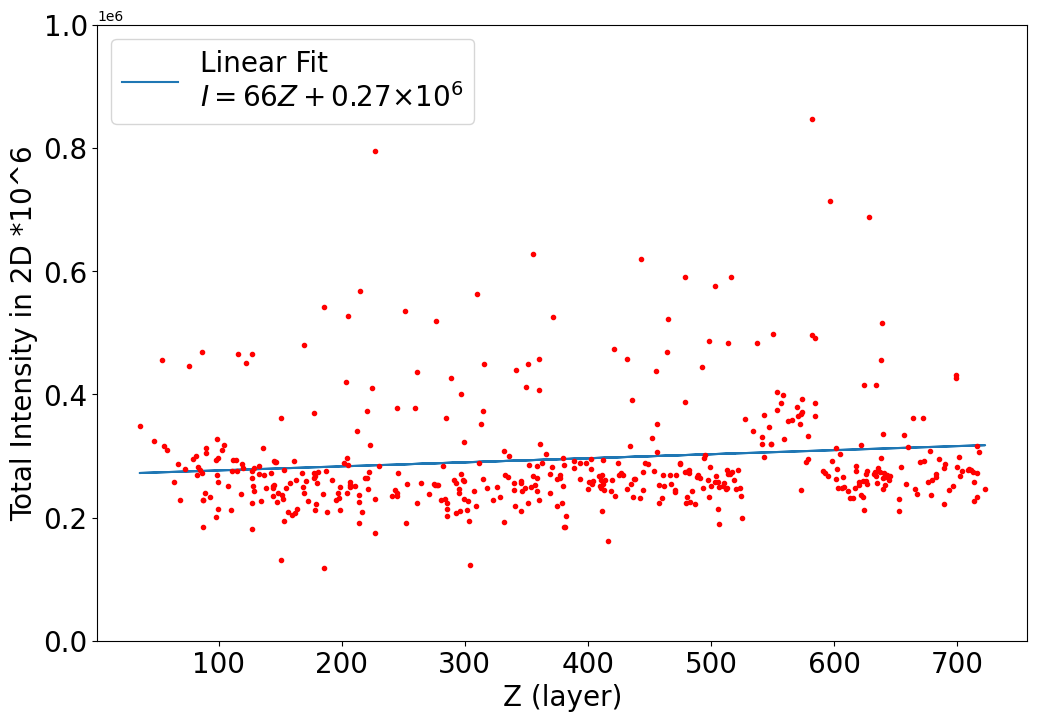

In [6]:
def normalization(Xd,Yd,totId, Xi,Yi,totIi):
    # detection of same (Xd,Yd) (Xi,Yi) and align to the same index + summation
    Xsum, Ysum = [],[]
    totIsum = []
    
    CommonNumd = []
    for i in range(0, len(Xd)):
        for j in range(0, len(Xi)):
            if np.abs(Xd[i] - Xi[j]) < 2 and np.abs(Yd[i] - Yi[j]) < 2:
                CommonNumd.append(i)
                Xsum.append((Xd[i]+Xi[j])/2)
                Ysum.append((Yd[i]+Yi[j])/2)
    
                totIsum.append(totId[i]+totIi[j])
    
    # rearrange the index of (Xd,Yd) as (Xsum,Ysum)
    Xd2,Yd2 =[],[] # passed (Xd,Yd)
    totId2 = []
    a=0
    for i in CommonNumd:
        Xd2.append(Xd[CommonNumd[a]])
        Yd2.append(Yd[CommonNumd[a]])
        totId2.append(totId[CommonNumd[a]])
        a += 1
    
    # Normalization of decaying totI
    totIdnorm = np.array(totId2) / np.array(totIsum)

    return Xd2,Yd2,totId2, Xsum,Ysum,totIsum, totIdnorm





Xd2,Yd2,totId2, Xsum,Ysum,totIsum, totIdnorm = [],[],[], [],[],[], []
Xd2,Yd2,totId2, Xsum,Ysum,totIsum, totIdnorm = normalization(Xd,Yd,totId, Xi,Yi,totIi)


# Zo-totIsum index matching by neighborhood detection between (Xsum,Ysum) and (Xo,Yo)
Xsumcorrect, Ysumcorrect, totIsumcorrect = [],[],[]
Xosum,Yosum,Zosum = [],[],[]
Xsumcorrect,Ysumcorrect,totIsumcorrect, Xosum,Yosum,Zosum = neighborhood_detection(Xsum,Ysum,totIsum, Xo,Yo,Zo, mindist=2)

poptsum, pcovsum, Ifitsum, perrsum = fit(Zosum, totIsumcorrect)
plttot(Zosum,totIsumcorrect,Ifitsum, "Z (layer)", "Total Intensity in 2D *10^6", poptsum, 'fig/2DTotalIntensiySUM.jpg', ylim=[0,1*10**6])

[-0.00102412  0.90167025]
[[ 8.40880895e-11 -3.24367265e-08]
 [-3.24367265e-08  1.55648784e-05]]


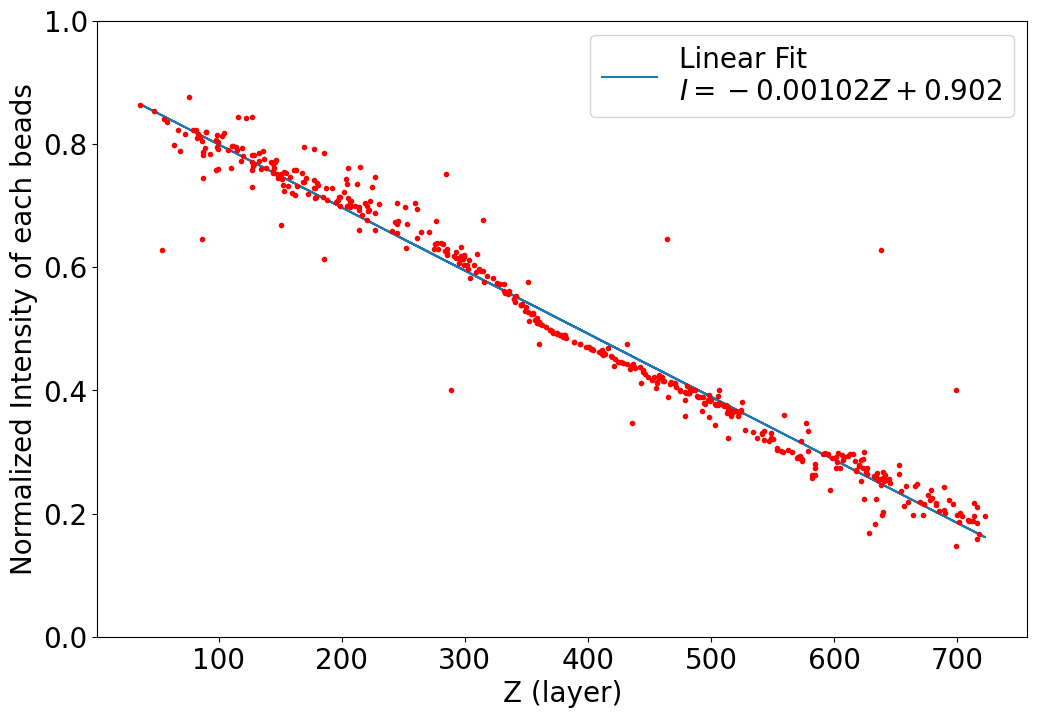

In [7]:
# Zo-totIsum index matching by neighborhood detection between (Xsum,Ysum) and (Xo,Yo)
Xdnormcorrect, Ydnormcorrect, totIdnormcorrect = [],[],[]
Xonorm,Yonorm,Zonorm = [],[],[]
Xdnormcorrect, Ydnormcorrect, totIdnormcorrect, Xonorm,Yonorm,Zonorm = neighborhood_detection(Xsum,Ysum,totIdnorm, Xo,Yo,Zo, mindist=2)

poptdnorm, pcovdnorm, Ifitdnorm, perrdnorm = fit(np.array(Zonorm), np.array(totIdnormcorrect))
plttot(Zonorm,totIdnormcorrect,Ifitdnorm, "Z (layer)", "Normalized Intensity of each beads", poptdnorm, 'fig/z-totInormalized.jpg', ylim=[0,1], 
       a ="Rate")
# pltdist(Xd3,Yd3,'X (pixel)', 'Y (pixel)', 'fig/dist2DD2.jpg')

# pltprojection(np.array(Xd3), np.array(totIdnorm3), 'X (pixel)', 'Normalized Total Intensity', 'fig/XprojectionD2.jpg', ylim=None)
# pltprojection(np.array(Yd3), np.array(totIdnorm3), 'Y (pixel)', 'Normalized Total Intensity', 'fig/YprojectionD2.jpg', ylim=None)